# Project.1-Logistic Regression(B)

In [4]:
import pandas as pd
import numpy as np


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [6]:
df=pd.read_csv('resale_discrete.csv')


In [7]:
df.columns

Index(['Unnamed: 0', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price'],
      dtype='object')

### Replacing Medium to High

In [8]:
df['resale_price']=df['resale_price'].replace("Medium", "High")

Only want to get 3 features

In [9]:
df=df[['floor_area_sqm', 'resale_price',  'street_name', 'resale_price']]


Rename the *resale_price* feature to *class_name* for visualisation purposes

In [10]:
df.columns=['floor_area_sqm', 'resale_price', 'street_name', 'class_name']

In [11]:
y=df['resale_price']
X=df[['floor_area_sqm']]


In [12]:
y=y.map({'Low':0, 'High':1}) 

In [13]:
class_names=['Low', 'High']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.fit(X_train, y_train).predict(X_test)

In [16]:
scores = cross_val_score(logreg, X, y, cv=5)
scores    

array([ 0.85286783,  0.82294264,  0.8475    ,  0.8320802 ,  0.85213033])

In [17]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.02)


In [18]:
metrics.accuracy_score(y_test, y_pred) 

0.82599999999999996

In [19]:
confusion_matrix(y_test, y_pred)

array([[ 90,  59],
       [ 28, 323]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

        Low       0.76      0.60      0.67       149
       High       0.85      0.92      0.88       351

avg / total       0.82      0.83      0.82       500



In [21]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,90,59,149
1,28,323,351
All,118,382,500


Confusion matrix, without normalization
[[ 90  59]
 [ 28 323]]


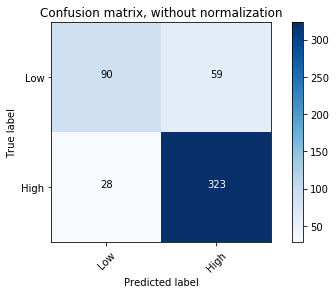

In [22]:

import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

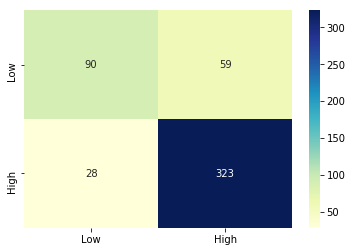

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred)
#g=pd.DataFrame(cnf_matrix, index=('a','b','c'), columns=('a','b','c'))
g=pd.DataFrame(cnf_matrix, index=class_names, columns=class_names)


import seaborn as sns
sns.heatmap(g, annot=True, fmt="d",cmap="YlGnBu")

In [51]:
from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

        Low       0.76      0.60      0.67       149
       High       0.85      0.92      0.88       351

avg / total       0.82      0.83      0.82       500



In [52]:
metrics.accuracy_score(y_test, y_pred)

0.82599999999999996

In [53]:
predict_probabilities = logreg.predict_proba(X_test)[:,1]


In [54]:
predict_probabilities

array([ 0.97,  0.18,  0.49,  0.19,  0.31,  0.91,  0.21,  0.13,  0.81,
        0.69,  0.98,  0.98,  0.23,  0.86,  0.74,  0.18,  0.53,  0.12,
        0.91,  0.75,  0.33,  0.99,  0.63,  0.21,  0.53,  0.53,  0.98,
        0.96,  0.11,  0.78,  0.89,  0.53,  0.82,  0.31,  0.98,  0.85,
        0.96,  0.19,  0.65,  0.89,  0.97,  0.96,  0.91,  0.65,  0.65,
        0.65,  1.  ,  0.69,  0.83,  0.23,  0.19,  0.49,  0.69,  0.19,
        0.31,  0.8 ,  0.7 ,  0.96,  0.96,  0.94,  0.92,  0.69,  0.21,
        0.37,  0.98,  0.12,  0.96,  0.61,  0.96,  0.96,  0.9 ,  0.7 ,
        0.69,  0.31,  0.99,  0.13,  0.91,  0.47,  0.05,  0.95,  0.82,
        0.63,  0.23,  0.96,  0.91,  0.97,  0.94,  0.67,  0.31,  0.23,
        0.81,  0.63,  0.29,  0.85,  0.41,  0.69,  1.  ,  0.12,  0.12,
        0.21,  0.21,  0.99,  0.85,  0.85,  0.96,  0.95,  0.94,  0.91,
        0.19,  0.93,  0.97,  0.81,  0.99,  0.83,  0.93,  0.53,  0.63,
        0.85,  0.91,  0.69,  0.95,  0.69,  0.98,  0.67,  0.82,  0.91,
        0.85,  0.53,

In [55]:
fpr, tpr, _ = roc_curve(y_test, predict_probabilities)

In [56]:
_

array([ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.99,  0.99,  0.99,
        0.99,  0.99,  0.98,  0.98,  0.98,  0.98,  0.98,  0.98,  0.97,
        0.97,  0.97,  0.96,  0.96,  0.96,  0.95,  0.95,  0.95,  0.94,
        0.93,  0.92,  0.91,  0.91,  0.9 ,  0.89,  0.88,  0.87,  0.86,
        0.85,  0.84,  0.83,  0.81,  0.8 ,  0.78,  0.77,  0.75,  0.74,
        0.72,  0.7 ,  0.69,  0.67,  0.65,  0.63,  0.61,  0.59,  0.57,
        0.55,  0.53,  0.51,  0.49,  0.41,  0.37,  0.35,  0.33,  0.31,
        0.28,  0.26,  0.24,  0.23,  0.21,  0.2 ,  0.19,  0.18,  0.16,
        0.14,  0.14,  0.13,  0.12,  0.11,  0.1 ,  0.03])

In [57]:
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75

0.75

In [58]:
predict_probabilities.shape

(500,)

In [59]:
y_test.shape

(500,)

In [60]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_probabilities)
roc_auc = auc(false_positive_rate, true_positive_rate)

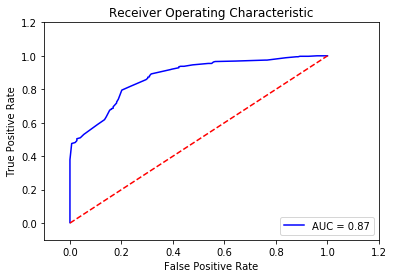

In [61]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()